<a href="https://colab.research.google.com/github/carlibeisel/Drains_Lower_Boise_River/blob/main/*water_rights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Rights in the Treasure Valley for Drainsheds

By: Carli Beisel


Created on August 2024


Purpose:

1) Crop Water Rights layer to drainshds in the Treasure Valley and also create a separate file that organizes all WR based on priorty year + surface/groundwater.


2) Create a figure showing the difference between surface + groundwater rights.

3) Create a figure showing change in water rights over time based on priorty date.

## 1. Organize IDWR Water Right Data from GIS Data Hub

Separate based on surface/groundwater rights and organize based on priority year.  

In [ ]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ----------------------------------- #
#     Rename Drains in LBRB           #
# ----------------------------------- #

# Function to rename names in the 'Name' column of a shapefile
def rename_names_in_shapefile(shapefile_path, output_path, name_mapping):
    """
    Rename names in the 'Name' column of a shapefile.

    Parameters:
    shapefile_path (str): Path to the input shapefile.
    output_path (str): Path to save the modified shapefile.
    name_mapping (dict): Dictionary where keys are old names and values are new names.

    """
    gdf = gpd.read_file(shapefile_path)
    if 'Name' not in gdf.columns:
        raise ValueError("The shapefile does not contain a 'Name' column.")
    gdf['Name'] = gdf['Name'].replace(name_mapping)
    gdf.to_file(output_path)
    print(f"Shapefile with updated names saved to {output_path}")

if __name__ == "__main__":
    input_shapefile = '/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_Merge_07072022.shp'
    output_shapefile = '/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_08162024.shp'

    # Dictionary with old names as keys and new names as values
    name_changes = {
        'Dixie drain': 'Dixie Drain',
        'East Hartley Drain': 'East Hartley Gulch',
        'West Hartley': 'West Hartley Gulch',
        'Drainage District No. 3': 'Drainage District No3'
    }

    rename_names_in_shapefile(input_shapefile, output_shapefile, name_changes)

Shapefile with updated names saved to /content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_08162024.shp


In [ ]:
# ----------------------------------- #
#         Crop to the LBRB            #
# ----------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
lbrb = gpd.read_file('/content/drive/MyDrive/Data/GIS Shapefiles/LBRB_shp/LBRB_file.shp')

lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')

lbrb_water_rights.to_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_lbrb_masked/lbrb_water_rights.shp')

<ipython-input-46-8ea92cc00dca>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:8826
Right CRS: EPSG:4326

  lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [ ]:
# ----------------------------------- #
#       Convert .SHP to .CSV          #
# ----------------------------------- #
lbrb_water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights/lbrb_water_rights.shp')

wr = pd.DataFrame(water_rights.drop(columns='geometry'))
wr.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv', index=False)


In [ ]:
# ----------------------------------- #
#       Crop WR to Drainsheds         #
# ----------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
drainsheds = gpd.read_file('/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_08162024.shp')
names = drainsheds['Name']
water_rights = water_rights.to_crs(drainsheds.crs)
output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'

# Create function to crop water rights to each drainshed area
def crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir):
    mask_gdf = drainsheds
    for i, mask_feature in mask_gdf.iterrows():
        mask_geom = mask_feature['geometry']
        mask_name = mask_feature['Name']

        cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')

        output_filename = os.path.join(output_dir, f"{mask_name}_wr.shp")

        # Save the cropped shapefile
        cropped_gdf.to_file(output_filename)
        print(f"Cropped shapefile saved to {output_filename}")

crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/East Hartley Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Willow Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Conway Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/ThurmanDrain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/North Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/South Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Indian Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Drainage District No3_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Fifteen Mile Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Dixie Drain_wr.shp


In [ ]:
# ----------------------------------- #
#   Convert Drain WR to CSV File      #
# ----------------------------------- #

shapefiles = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.shp')

csv_output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    base_name = os.path.basename(shapefile)
    drainshed_name = base_name.split('_wr')[0]  # Extracting the part before '_wr'
    gdf['Drainshed'] = drainshed_name #add a column for each drainshed name
    csv_filename = os.path.splitext(base_name)[0] + '.csv'
    csv_filepath = os.path.join(csv_output_dir, csv_filename)
    gdf.to_csv(csv_filepath, index=False)
    print(f"Converted {shapefile} to {csv_filepath} with added 'Drainshed' column.")

Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley Gulch_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley Gulch_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.csv with added 'Drainshed' column.
Conv

In [ ]:
# ----------------------------------------- #
#      Merge drainhed WRs into one file     #
# ----------------------------------------- #

csv_files = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.csv')
df_list = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv', index=False)

#add in new column to separate GW from SW
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')
file['Type'] = file['Source'].apply(lambda x: 'GW' if x == 'GROUND WATER' else 'SW')
file.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv', index=False)

In [ ]:
# ------------------------------ #
#      Drain WRs Model Input     #
# ------------------------------ #
# based on SW + GW + total

file_path = '/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv'
df = pd.read_csv(file_path)

# Convert 'PriorityDa' column to datetime format and extract the year
df['PriorityDa'] = pd.to_datetime(df['PriorityDa'], format='%Y-%m-%d', errors='coerce')
df['Year'] = df['PriorityDa'].dt.year

# Group by year, type, and drainage area (assuming 'Drainshed' is the column for drainage)
yearly_priority_counts = df.groupby(['Year', 'Type', 'Drainshed']).agg({'PriorityDa': 'nunique'}).reset_index()
yearly_priority_counts.rename(columns={'PriorityDa': 'Water Rights'}, inplace=True)

# Pivot the table to create separate columns for GW and SW water rights for each drainage
pivot_counts = yearly_priority_counts.pivot_table(index=['Year', 'Drainshed'], columns='Type', values='Water Rights', fill_value=0).reset_index()

pivot_counts.columns = ['Year', 'Drainshed', 'GW Water Rights', 'SW Water Rights']

# Add a column for total water rights (GW + SW)
pivot_counts['Total Water Rights'] = pivot_counts['GW Water Rights'] + pivot_counts['SW Water Rights']

# Calculate cumulative water rights (GW, SW, Total) for each drainage area individually
pivot_counts['gw_wr'] = pivot_counts.groupby('Drainshed')['GW Water Rights'].cumsum()
pivot_counts['sw_wr'] = pivot_counts.groupby('Drainshed')['SW Water Rights'].cumsum()
pivot_counts['total_wr'] = pivot_counts.groupby('Drainshed')['Total Water Rights'].cumsum()

# Create a new DataFrame that stores this information
wr_final = pivot_counts

columns_to_save = [
    'Year',         # Year
    'Drainshed',               # Drainage area
    'gw_wr',    # Cumulative Groundwater Water Rights
    'sw_wr',    # Cumulative Surface Water Rights
    'total_wr'  # Cumulative Total Water Rights
]

# Save the selected columns to a new CSV file
output_file_path = '/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv'
wr_final[columns_to_save].to_csv(output_file_path, index=False)

In [ ]:
output_file_path = '/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv'

'/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv'

In [ ]:
output_file_path = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv')
output_file_path

,Year,Drainshed,gw_wr,sw_wr,total_wr
0,1852,South Middleton,1.0,0.0,1.0
1,1862,Mason Creek,1.0,0.0,1.0
2,1863,Fifteen Mile Creek,0.0,1.0,1.0
3,1863,Indian Creek,0.0,1.0,1.0
4,1864,Dixie Drain,1.0,2.0,3.0
...,...,...,...,...,...
1678,2021,Mason Creek,1314.0,60.0,1374.0
1679,2021,North Middleton,207.0,37.0,244.0
1680,2021,South Middleton,800.0,51.0,851.0
1681,2022,East Hartley Gulch,249.0,25.0,274.0


## 2. Create a figure showing the difference between surface and groundwater rights in the Treasure Valley.

In [ ]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define custom color palette
custom_palette = {'PrioirtyYear': '#A63A50', 'DecreedYear': '#FF9000'}
custom_palette = {'GW': '#133C56', 'SW': '#84BBDD'}

<ipython-input-5-e6da716f2907>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=custom_colors)


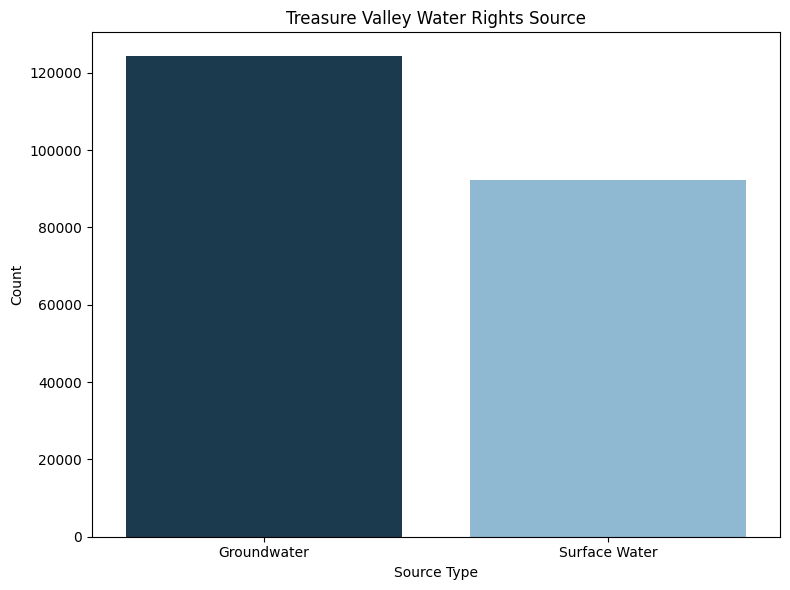

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (bar)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)


groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

custom_colors = ['#133C56', '#84BBDD']
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette=custom_colors)

plt.title('Treasure Valley Water Rights Source')
plt.xlabel('Source Type')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/gw_sw_wr_bar.png')
plt.show()


<ipython-input-70-8c9ad98f612d>:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



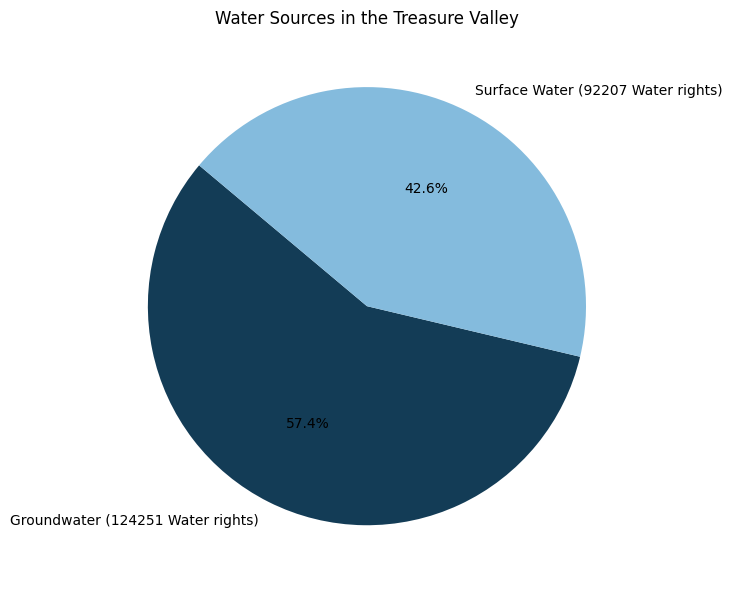

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (pie)    #
# ----------------------------------- #

# pie chart of total WR count in SW/GW

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

# count the number of water rights for groundwater and surface water
counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

# create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#133C56', '#84BBDD'])

# add the total number of water rights to the labels
for i, text in enumerate(texts):
    text.set_text(f"{text.get_text()} ({counts[i]} Water rights)")

plt.title('Water Sources in the Treasure Valley')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/wr_count_pie.png')
plt.show()

<ipython-input-69-e5c41a5b1555>:22: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



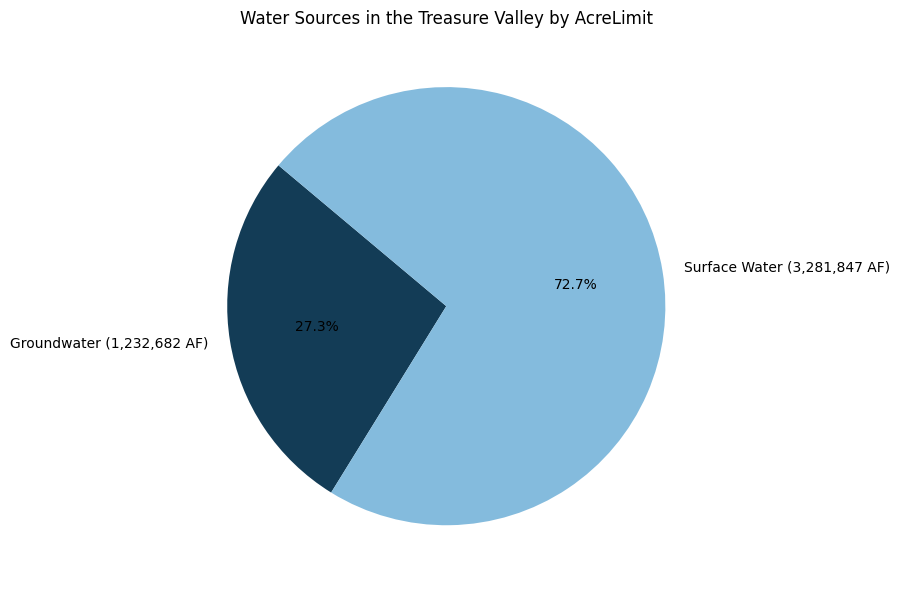

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (pie)    #
# ----------------------------------- #

# pie chart of AcreLimit sum of SW/GW

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

sums = pd.Series({
    'Groundwater': round(groundwater['AcreLimit'].sum()),
    'Surface Water': round(surface_water['AcreLimit'].sum())
})

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140, colors=['#133C56', '#84BBDD'])

for i, text in enumerate(texts):
    text.set_text(f"{text.get_text()} ({sums[i]:,} AF)")

plt.title('Water Sources in the Treasure Valley by AcreLimit')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/wr_acrelimit_pie.png')
plt.show()

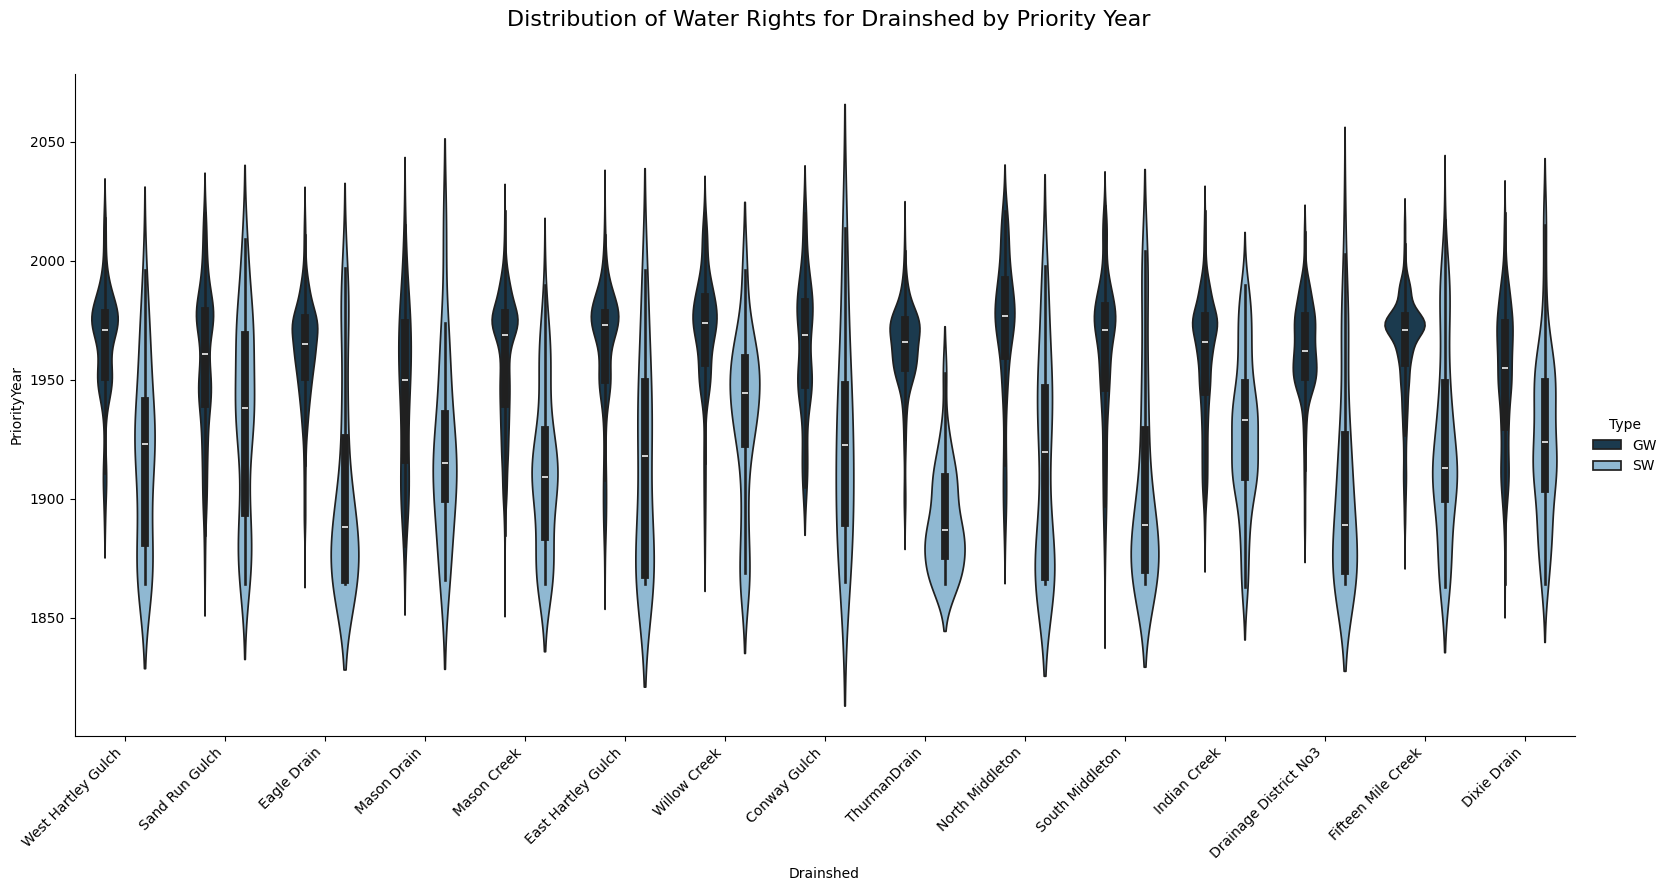

In [ ]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds
#       Priority Year
# ----------------------------------- #


#violin plot of all drainages

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

file['PriorityDa'] = pd.to_datetime(file['PriorityDa'])
file['PriorityYear'] = file['PriorityDa'].dt.year

custom_palette = {'GW': '#133C56', 'SW': '#84BBDD'}

plot = sns.catplot(
    data=file, x="Drainshed", y="PriorityYear", hue="Type",
    kind="violin", height=8, aspect=2, palette=custom_palette)

plot.set_xticklabels(rotation=45, ha='right')
plot.fig.suptitle("Distribution of Water Rights for Drainshed by Priority Year", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/wr_drainshed_priority.png')

plt.show()

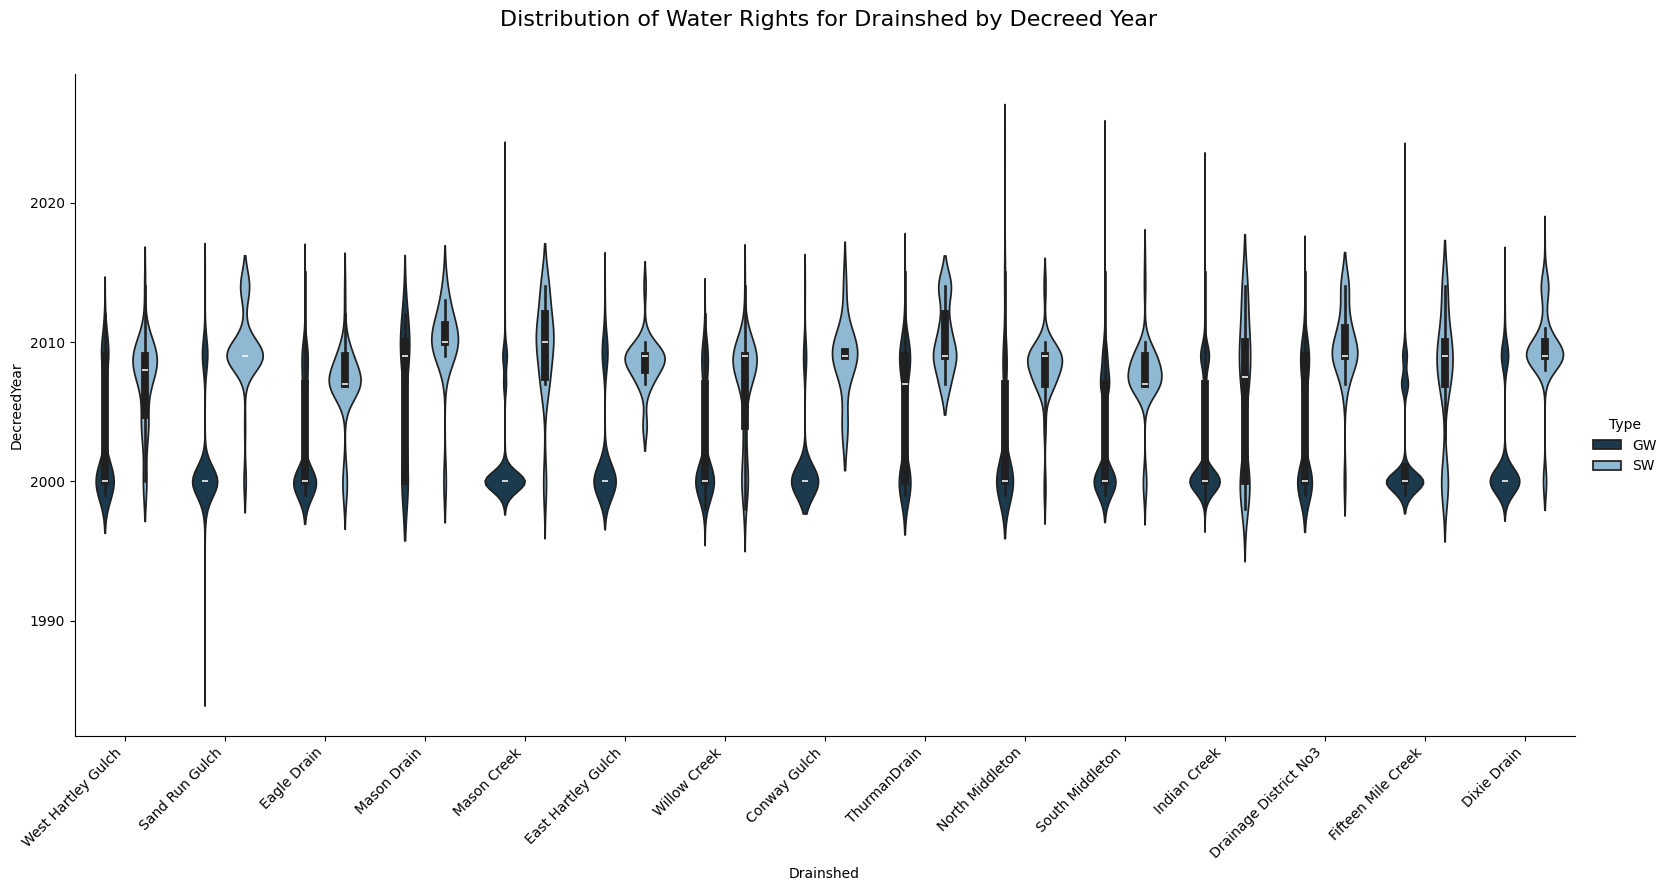

In [ ]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds
#       Decreed Year
# ----------------------------------- #


#violin plot of all drainages

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

file['DecreedDat'] = pd.to_datetime(file['DecreedDat'])
file['DecreedYear'] = file['DecreedDat'].dt.year

custom_palette = {'GW': '#133C56', 'SW': '#84BBDD'}

plot = sns.catplot(
    data=file, x="Drainshed", y="DecreedYear", hue="Type",
    kind="violin", height=8, aspect=2, palette=custom_palette)

plot.set_xticklabels(rotation=45, ha='right')
plot.fig.suptitle("Distribution of Water Rights for Drainshed by Decreed Year", fontsize=16)
plot.fig.subplots_adjust(top=0.9)

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/wr_drainshed_decree.png')

plt.show()

## 3. Create a figure showing change in water rights over time based on priorty date.

In [1]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob
from matplotlib.ticker import MaxNLocator, FuncFormatter
import plotly.graph_objects as go

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define custom color palette
custom_palette = {'PrioirtyYear': '#A63A50', 'DecreedYear': '#FF9000'}
custom_palette = {'GW': '#133C56', 'SW': '#84BBDD'}

In [17]:
##------------------------##
#       WR Info           #
##------------------------##

# top 30 WR Owners
top_30 = df.sort_values(by='AcreLimit', ascending=False).head(30)
top_30_owners = top_30[['Owner', 'AcreLimit']]
print("Top 30 Owners by AcreLimit:")
print(top_30_owners)

# how many WRs are in each category?
greater_than_1000 = (df['AcreLimit'] > 1000).sum()
less_than_1000 = (df['AcreLimit'] < 1000).sum()
less_than_500 = (df['AcreLimit'] < 500).sum()
less_than_100 = (df['AcreLimit'] < 100).sum()
equal_to_1 = (df['AcreLimit'] == 1).sum()
print(f"Number of water rights > 1000 AcreFeet: {greater_than_1000}")
print(f"Number of water rights < 1000 AcreFeet: {less_than_1000}")
print(f"Number of water rights < 500 AcreFeet: {less_than_500}")
print(f"Number of water rights < 100 AcreFeet: {less_than_100}")
print(f"Number of water rights = 1 AcreFeet: {equal_to_1}")

Top 30 Owners by AcreLimit:
                                          Owner  AcreLimit
156196             NORTH SIDE CANAL COMPANY LTD  120000.00
196770                   BIG WOOD CANAL COMPANY   74000.00
196783                   BIG WOOD CANAL COMPANY   74000.00
196773                   BIG WOOD CANAL COMPANY   74000.00
196780                   BIG WOOD CANAL COMPANY   74000.00
196781                   BIG WOOD CANAL COMPANY   74000.00
142004  UNITED STATES OF AMERICA ACTING THROUGH   62604.30
189497  UNITED STATES OF AMERICA ACTING THROUGH   62361.00
145355  UNITED STATES OF AMERICA ACTING THROUGH   57020.00
157442  UNITED STATES OF AMERICA ACTING THROUGH   56392.00
163549               BURLEY IRRIGATION DISTRICT   41202.00
196779                   BIG WOOD CANAL COMPANY   39683.00
196778                   BIG WOOD CANAL COMPANY   39683.00
196775                   BIG WOOD CANAL COMPANY   39683.00
196777                   BIG WOOD CANAL COMPANY   39683.00
196776                   BIG

In [12]:
greater_than_1000 = (df['AcreLimit'] > 1000).sum()
less_than_1000 = (df['AcreLimit'] < 1000).sum()
less_than_500 = (df['AcreLimit'] < 500).sum()
less_than_100 = (df['AcreLimit'] < 100).sum()
equal_to_1 = (df['AcreLimit'] == 1).sum()


# Display the results
print(f"Number of water rights > 1000 AcreFeet: {greater_than_1000}")
print(f"Number of water rights < 1000 AcreFeet: {less_than_1000}")
print(f"Number of water rights < 500 AcreFeet: {less_than_500}")
print(f"Number of water rights < 100 AcreFeet: {less_than_100}")
print(f"Number of water rights = 1 AcreFeet: {equal_to_1}")

Number of water rights > 1000 AcreFeet: 379
Number of water rights < 1000 AcreFeet: 216078
Number of water rights < 500 AcreFeet: 215662
Number of water rights < 100 AcreFeet: 210654
Number of water rights = 1 AcreFeet: 259


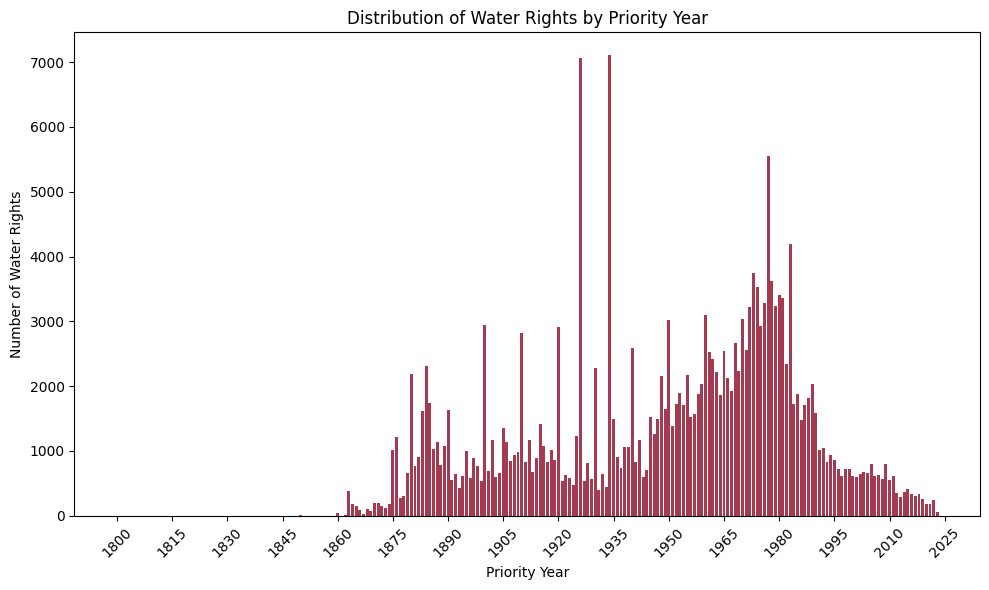

In [ ]:
# ----------------------------------- #
#       Figure for All of TV
#          (priority year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year

year_counts = data['PriorityYear'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_counts.index, year_counts.values, color='#A63A50', width =0.8)

ax.xaxis.set_major_locator(MaxNLocator(20))

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Distribution of Water Rights by Priority Year')
plt.xlabel('Priority Year')
plt.ylabel('Number of Water Rights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/total_wr_by_priority_year.png')
plt.show()

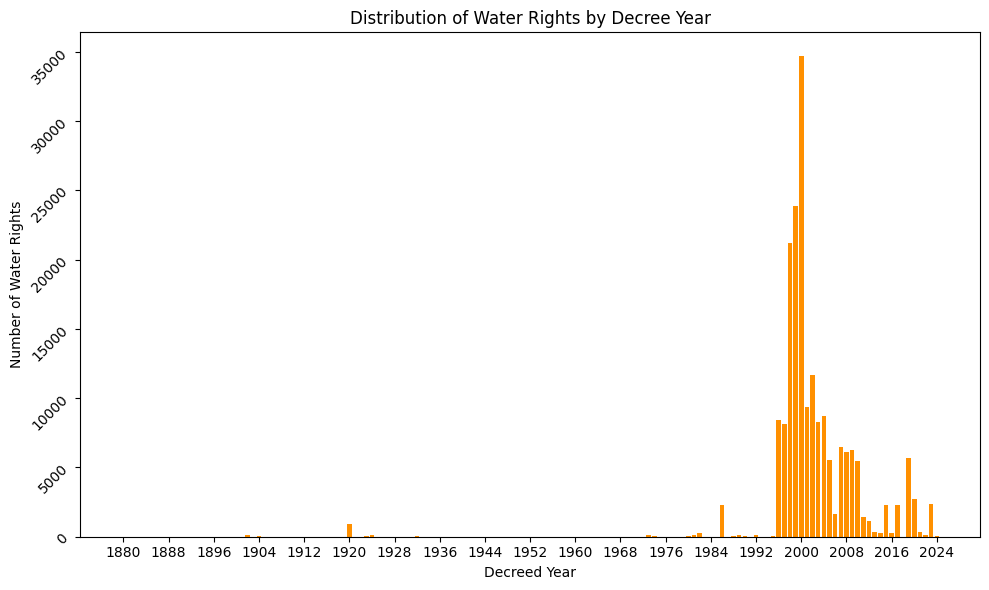

In [ ]:
# ----------------------------------- #
#       Figure for All of TV
#          (decreed year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year

year_counts = data['DecreedYear'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_counts.index, year_counts.values, color='#FF9000')

ax.xaxis.set_major_locator(MaxNLocator(20))

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Distribution of Water Rights by Decree Year')
plt.xlabel('Decreed Year')
plt.ylabel('Number of Water Rights')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/total_wr_by_decreed_year.png')
plt.show()

<ipython-input-27-d62e7a75ee8f>:19: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='Year', y='Type', data=melted_data, hue='Type', palette=custom_palette, scale='count', legend=False)


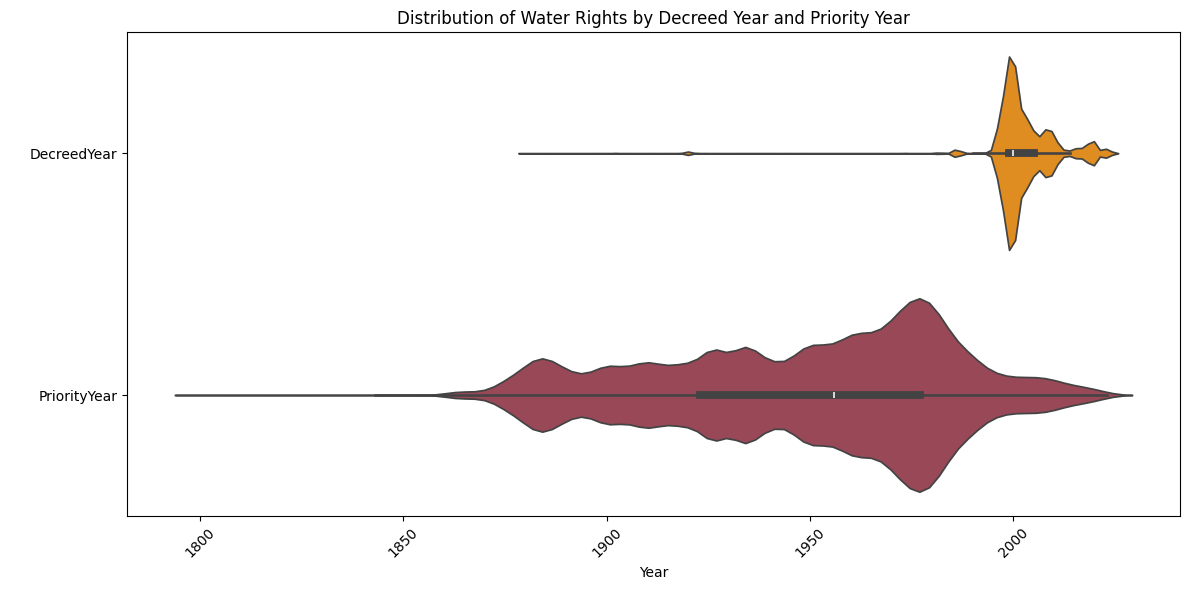

In [ ]:
# ----------------------------------- #
#       Figure for All of TV
#      (decreed + priority year)
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year

data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year

melted_data = pd.melt(data, value_vars=['DecreedYear', 'PriorityYear'], var_name='Type', value_name='Year')

custom_palette = {'PriorityYear': '#A63A50', 'DecreedYear': '#FF9000'}

plt.figure(figsize=(12, 6))
sns.violinplot(x='Year', y='Type', data=melted_data, hue='Type', palette=custom_palette, scale='count', legend=False)

plt.title('Distribution of Water Rights by Decreed Year and Priority Year')
plt.xlabel('Year')
plt.ylabel(' ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/violin_wr_decree_vs_priority.png')
plt.show()

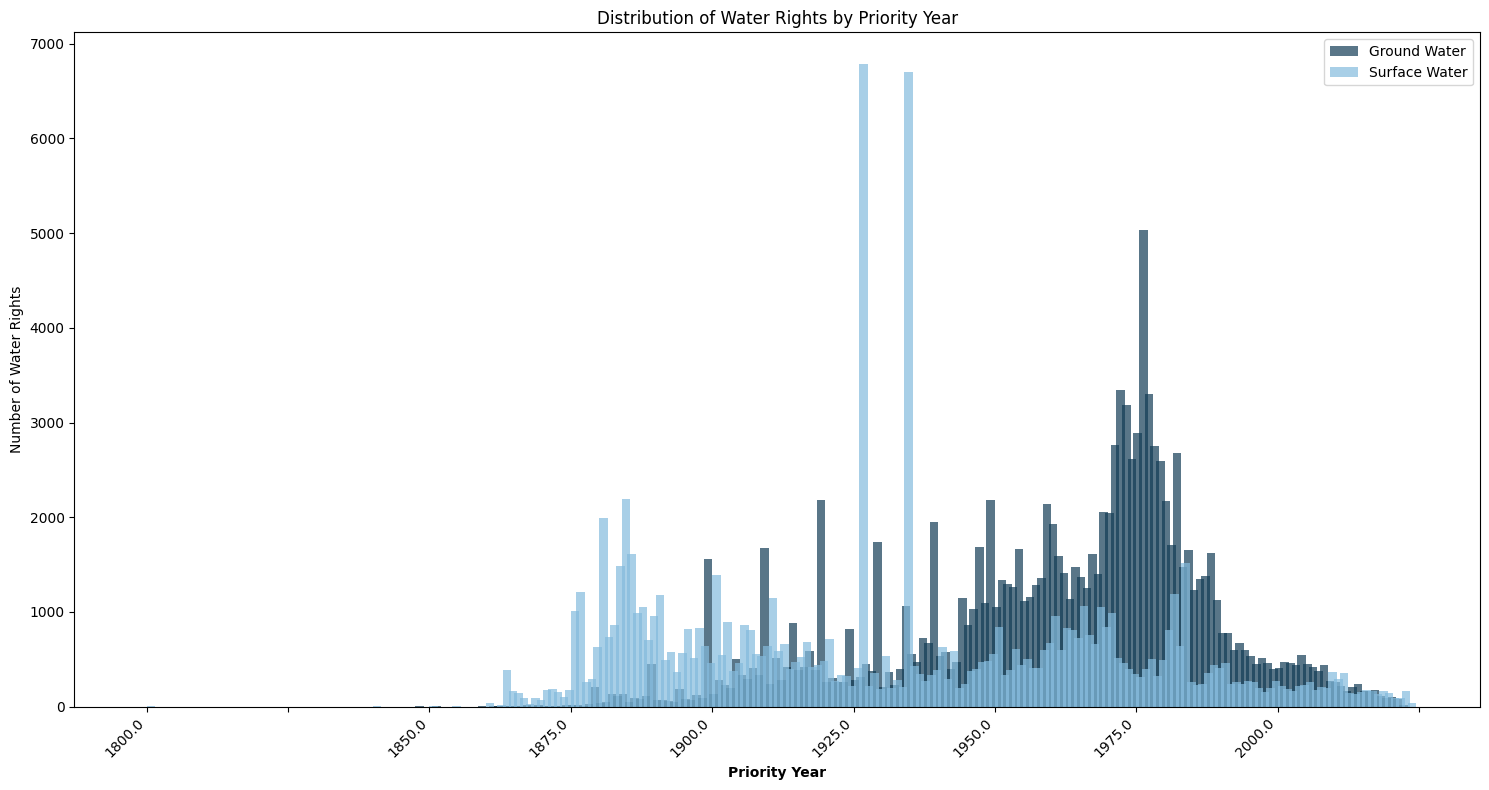

In [ ]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (priority year)
# ----------------------------------- #

# Load and process the data
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year
groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']
year_counts_gw = groundwater_data['PriorityYear'].value_counts().sort_index()
year_counts_sw = other_data['PriorityYear'].value_counts().sort_index()
combined_year_counts = pd.DataFrame({'Ground Water': year_counts_gw, 'Surface Water': year_counts_sw}).fillna(0)

# Convert years to integers
years = combined_year_counts.index.values.astype(int)

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 1.5

ax.bar(years - bar_width/2, combined_year_counts['Ground Water'], color='#133C56', width=bar_width, alpha=0.7, label='Ground Water')
ax.bar(years + bar_width/2, combined_year_counts['Surface Water'], color='#84BBDD', width=bar_width, alpha=0.7, label='Surface Water')

# Set x-axis labels to the actual years
ax.set_xlabel('Priority Year', fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha="right")

# Limit the number of x-axis ticks to make them more readable
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.set_ylabel('Number of Water Rights')
ax.set_title('Distribution of Water Rights by Priority Year')
ax.legend()
plt.tight_layout()

# Save the figure
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/priority_sw_gw.png')
plt.show()

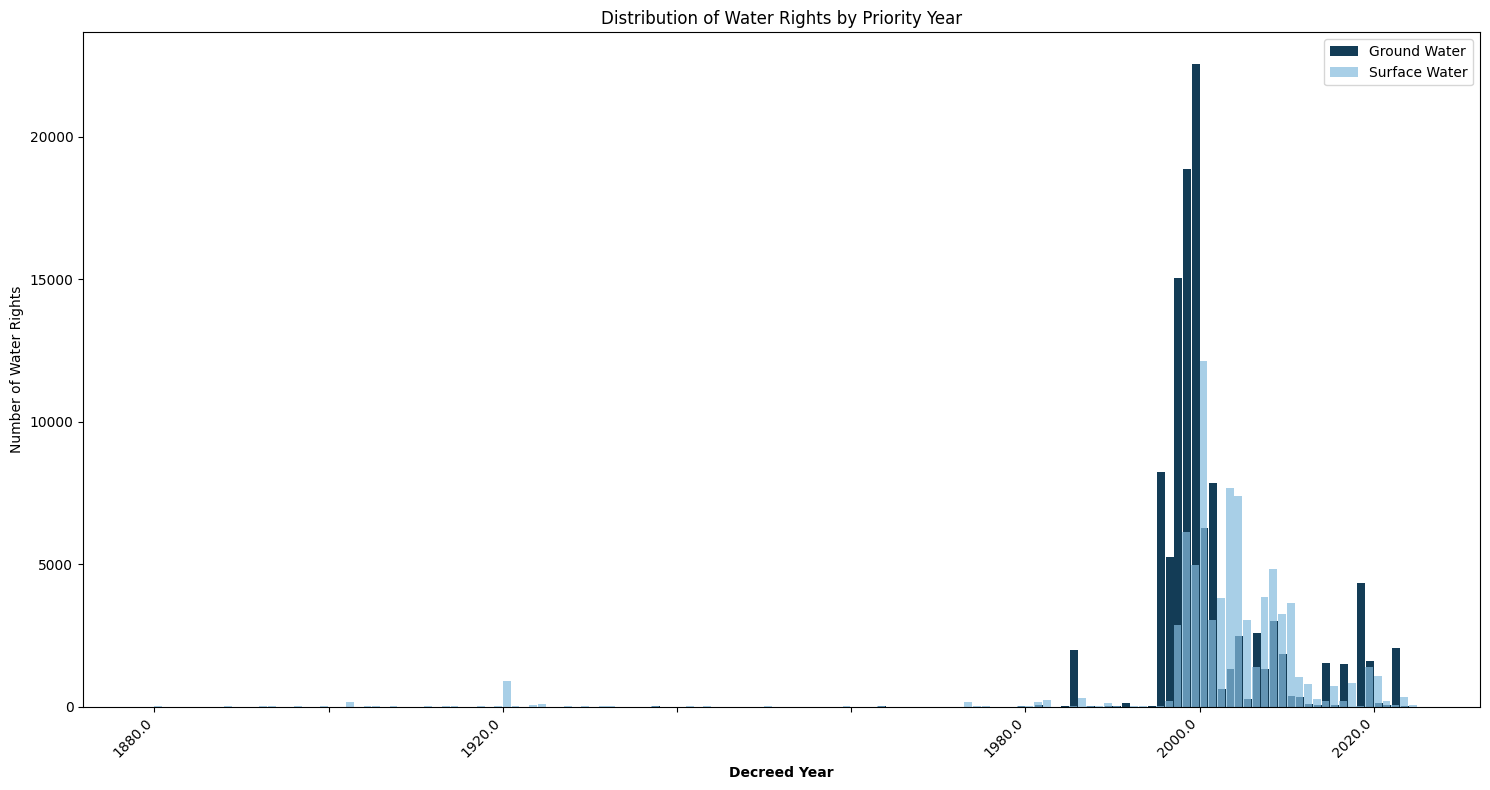

In [ ]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (decreed year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year
groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']
year_counts_gw = groundwater_data['DecreedYear'].value_counts().sort_index()
year_counts_sw = other_data['DecreedYear'].value_counts().sort_index()
combined_year_counts = pd.DataFrame({'Ground Water': year_counts_gw, 'Surface Water': year_counts_sw}).fillna(0)
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.9
years = combined_year_counts.index.values

ax.bar(years - bar_width/2, combined_year_counts['Ground Water'], color='#133C56', width=bar_width, label='Ground Water')
ax.bar(years + bar_width/2, combined_year_counts['Surface Water'], color='#84BBDD', width=bar_width, alpha = 0.7,label='Surface Water')

# Set x-axis labels to the actual years
ax.set_xlabel('Decreed Year', fontweight='bold')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha="right")

# Limit the number of x-axis ticks to make them more readable
ax.xaxis.set_major_locator(MaxNLocator(10))
ax.set_ylabel('Number of Water Rights')
ax.set_title('Distribution of Water Rights by Priority Year')
ax.legend()
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/decreed_sw_gw.png')
plt.show()

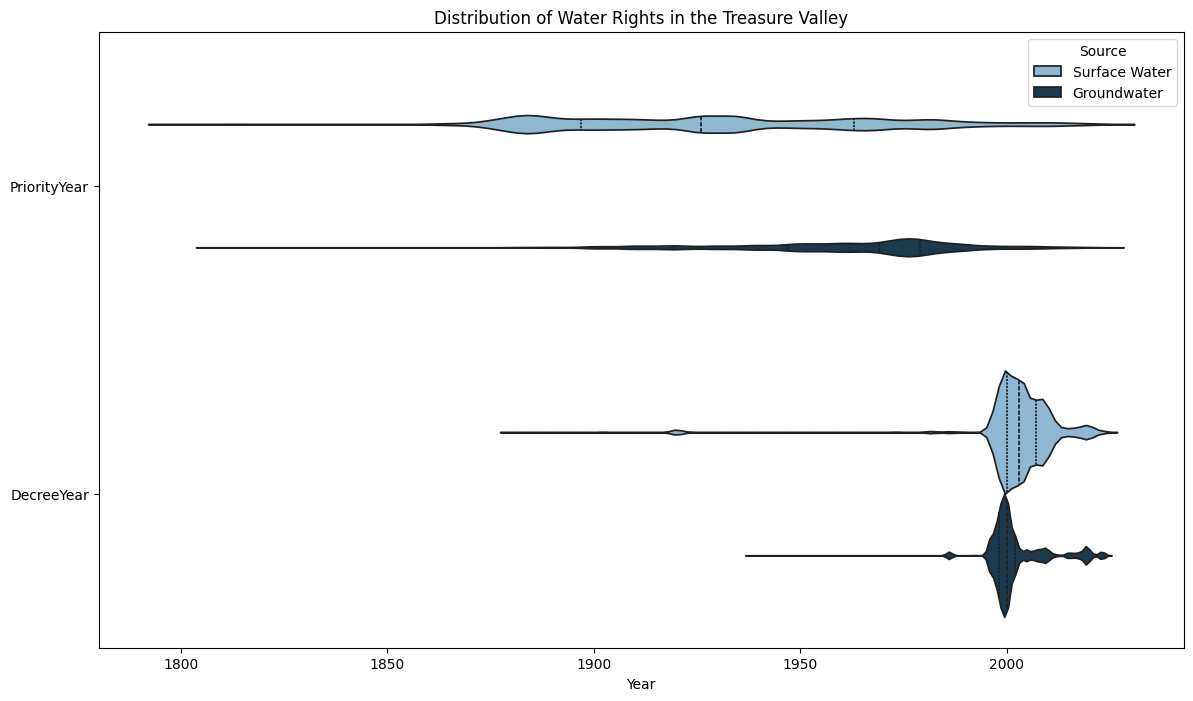

In [ ]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#      (violin plot split)
#      (priority + decree)
# ----------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
df['PriorityDa'] = pd.to_datetime(df['PriorityDa'])
df['DecreedDat'] = pd.to_datetime(df['DecreedDat'])
df['PriorityYear'] = df['PriorityDa'].dt.year
df['DecreeYear'] = df['DecreedDat'].dt.year

df['Source'] = df['Source'].apply(lambda x: 'Groundwater' if x == 'GROUND WATER' else 'Surface Water')

df_melted = pd.melt(df, id_vars=['Source'],
                    value_vars=['PriorityYear', 'DecreeYear'],
                    var_name='YearType', value_name='Year')

custom_palette = {'Groundwater': '#133C56', 'Surface Water': '#84BBDD'}
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='YearType', hue='Source', data=df_melted, inner="quartile", palette=custom_palette)
plt.title('Distribution of Water Rights in the Treasure Valley')
plt.ylabel('')
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/violin_all_data_split.png')
plt.show()

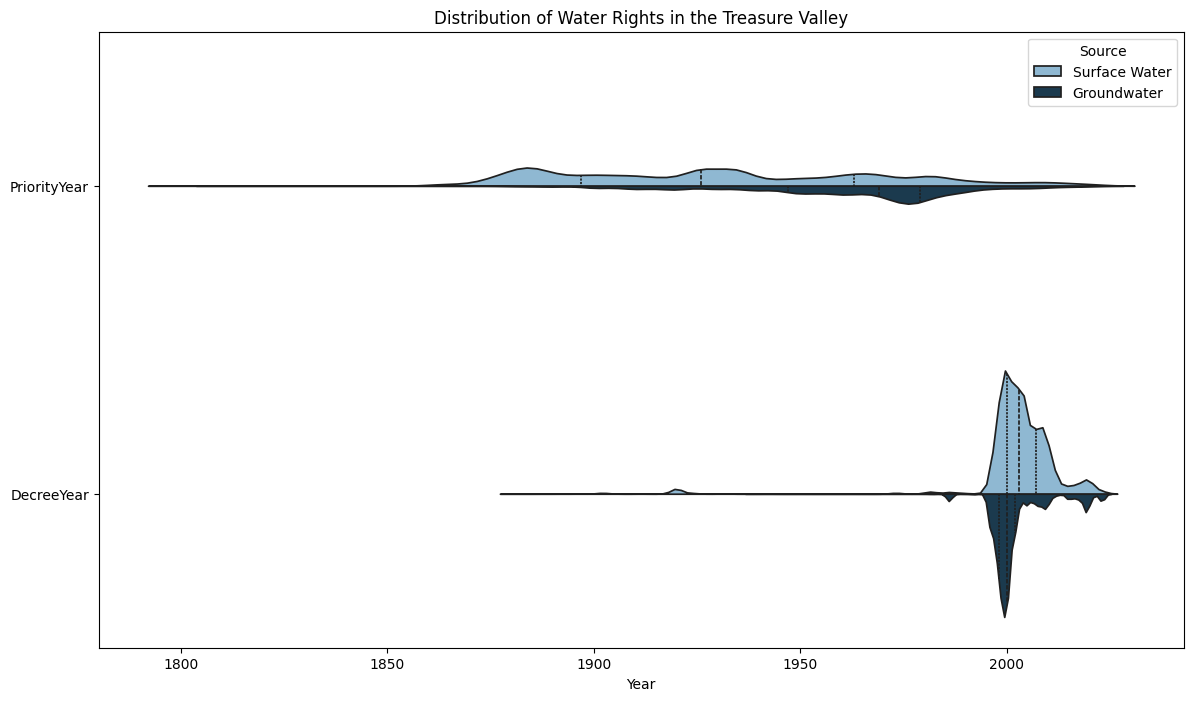

In [ ]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#      (violin plot split)
#      (priority + decree)
# ----------------------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
df['PriorityDa'] = pd.to_datetime(df['PriorityDa'])
df['DecreedDat'] = pd.to_datetime(df['DecreedDat'])
df['PriorityYear'] = df['PriorityDa'].dt.year
df['DecreeYear'] = df['DecreedDat'].dt.year

df['Source'] = df['Source'].apply(lambda x: 'Groundwater' if x == 'GROUND WATER' else 'Surface Water')

df_melted = pd.melt(df, id_vars=['Source'],
                    value_vars=['PriorityYear', 'DecreeYear'],
                    var_name='YearType', value_name='Year')

custom_palette = {'Groundwater': '#133C56', 'Surface Water': '#84BBDD'}

plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='YearType', hue='Source', data=df_melted, split=True, inner="quartile", palette=custom_palette)

plt.ylabel('')
plt.title('Distribution of Water Rights in the Treasure Valley')
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Rights/violin_all_data.png')
plt.show()

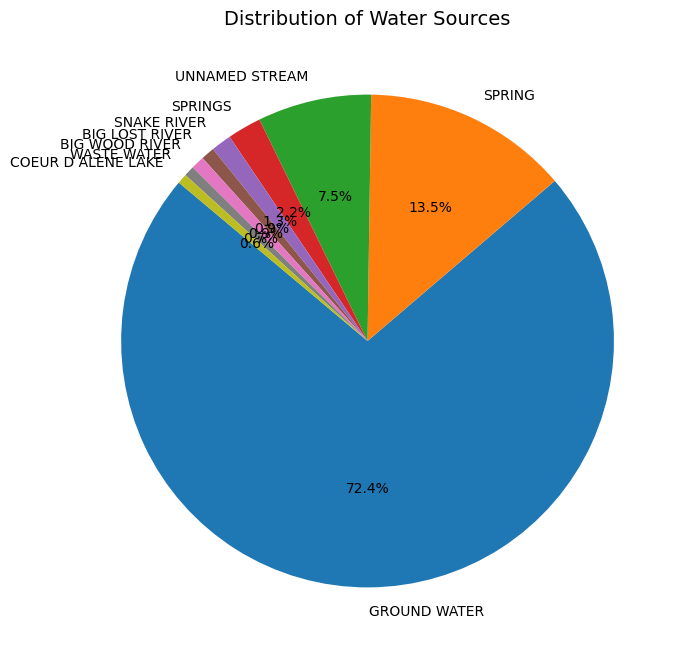

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (pie)   #
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['Source'] = data['Source'].astype(str)

counts = data['Source'].value_counts()
total_count = counts.sum()
filtered_counts = counts[counts / total_count >= 0.005]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Water Sources', fontsize=14)
plt.setp(plt.gca().texts, fontsize=10)
plt.show()